In [35]:
import json
import numpy as np
from sklearn.model_selection import train_test_split




In [73]:
with open('test1_embedding.json') as f:
    data = json.load(f)

In [74]:
data_x=[]
data_y=[]
for key in data:
    for embed in data[key]:
        data_x.append(embed)
        data_y.append(key)


In [75]:
tag=list(data.keys())
tag2idx = {t: i for i, t in enumerate(tag)}
idx2tag = {i: t for i, t in enumerate(tag)}
y_t=np.array([tag2idx[i] for i in data_y])



X_train, X_test, y_train, y_test = train_test_split(data_x,data_y,test_size=0.2, random_state=6)
X_test1, X_val, y_test1, y_val = train_test_split(X_test,y_test,test_size=0.5, random_state=6)


In [85]:
len(y_test)

8269

In [57]:
from sklearn.neural_network import MLPClassifier
snn_classifier = MLPClassifier(verbose=True,max_iter=300,hidden_layer_sizes=20,batch_size='auto',warm_start=True)
snn_classifier.fit(X_train, y_train)


Iteration 1, loss = 2.98786076
Iteration 2, loss = 2.06986795
Iteration 3, loss = 1.80368468
Iteration 4, loss = 1.72365435
Iteration 5, loss = 1.67686489
Iteration 6, loss = 1.64665795
Iteration 7, loss = 1.62279192
Iteration 8, loss = 1.60556660
Iteration 9, loss = 1.58894381
Iteration 10, loss = 1.57148409
Iteration 11, loss = 1.55996330
Iteration 12, loss = 1.54703994
Iteration 13, loss = 1.53315918
Iteration 14, loss = 1.52610482
Iteration 15, loss = 1.51513939
Iteration 16, loss = 1.50614153
Iteration 17, loss = 1.49742975
Iteration 18, loss = 1.48807954
Iteration 19, loss = 1.48226572
Iteration 20, loss = 1.47498157
Iteration 21, loss = 1.47063344
Iteration 22, loss = 1.46566279
Iteration 23, loss = 1.45861188
Iteration 24, loss = 1.45402702
Iteration 25, loss = 1.45032143
Iteration 26, loss = 1.44313498
Iteration 27, loss = 1.44091847
Iteration 28, loss = 1.43450579
Iteration 29, loss = 1.43027540
Iteration 30, loss = 1.42959475
Iteration 31, loss = 1.42432360
Iteration 32, los

Iteration 253, loss = 1.24344353
Iteration 254, loss = 1.24236079
Iteration 255, loss = 1.24384501
Iteration 256, loss = 1.24187770
Iteration 257, loss = 1.24288748
Iteration 258, loss = 1.24439738
Iteration 259, loss = 1.24086775
Iteration 260, loss = 1.24110046
Iteration 261, loss = 1.24323028
Iteration 262, loss = 1.24400248
Iteration 263, loss = 1.23953278
Iteration 264, loss = 1.24188419
Iteration 265, loss = 1.24227862
Iteration 266, loss = 1.24272164
Iteration 267, loss = 1.23982892
Iteration 268, loss = 1.24426600
Iteration 269, loss = 1.23842187
Iteration 270, loss = 1.24161921
Iteration 271, loss = 1.24219924
Iteration 272, loss = 1.24121253
Iteration 273, loss = 1.23873531
Iteration 274, loss = 1.24219227
Iteration 275, loss = 1.24073651
Iteration 276, loss = 1.23970488
Iteration 277, loss = 1.24099419
Iteration 278, loss = 1.23808892
Iteration 279, loss = 1.23974683
Iteration 280, loss = 1.23855175
Iteration 281, loss = 1.23616910
Iteration 282, loss = 1.23419934
Iteration 

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=20, learning_rate='constant',
              learning_rate_init=0.001, max_iter=300, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=True, warm_start=True)

In [41]:
snn_predictions

array(['other/supernatural', 'person/title', 'person/artist', ...,
       'organization/company', 'other/art', 'person/political_figure'],
      dtype='<U28')

In [58]:
from sklearn.metrics import classification_report
snn_predictions = snn_classifier.predict(X_test)
y_test_t=y_test#[idx2tag[i] for i in y_test]
y_pred_=snn_predictions#[idx2tag[i] for i in snn_predictions]
from sklearn.metrics import f1_score
print('micro f1-score\n')
print(f1_score(y_test_t, y_pred_, average='micro'))
print('macro f1-score\n')
print(f1_score(y_test_t, y_pred_, average='macro'))

print(classification_report(y_test_t,y_pred_ ))

micro f1-score

0.450454412195837
macro f1-score

0.22678492791195104


/home/aaloui/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/aaloui/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                              precision    recall  f1-score   support

          location/celestial       0.31      0.17      0.22        24
               location/city       0.36      0.44      0.40       364
            location/country       0.56      0.62      0.59       655
          location/geography       0.38      0.10      0.16        49
           location/geograpy       0.00      0.00      0.00         5
               location/park       0.00      0.00      0.00         3
          location/structure       0.28      0.15      0.20       170
            location/transit       0.00      0.00      0.00        14
        organization/company       0.57      0.75      0.65       514
      organization/education       0.52      0.39      0.44        88
     organization/government       0.08      0.05      0.06        60
       organization/military       0.21      0.06      0.09        83
          organization/music       0.29      0.11      0.16        35
organization/politi

In [43]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_t,y_pred_))

[[  5   3  13 ...   0   0   0]
 [  6 134 112 ...   0   0   5]
 [ 12 121 371 ...   1   1   6]
 ...
 [  0   0   4 ... 213   8  47]
 [  0   1   0 ...  13  17  16]
 [  0   3   3 ...  57  17 549]]


[10:00:08] ======== Monitor: Learner ========
[10:00:08] ======== Monitor: GBTree ========


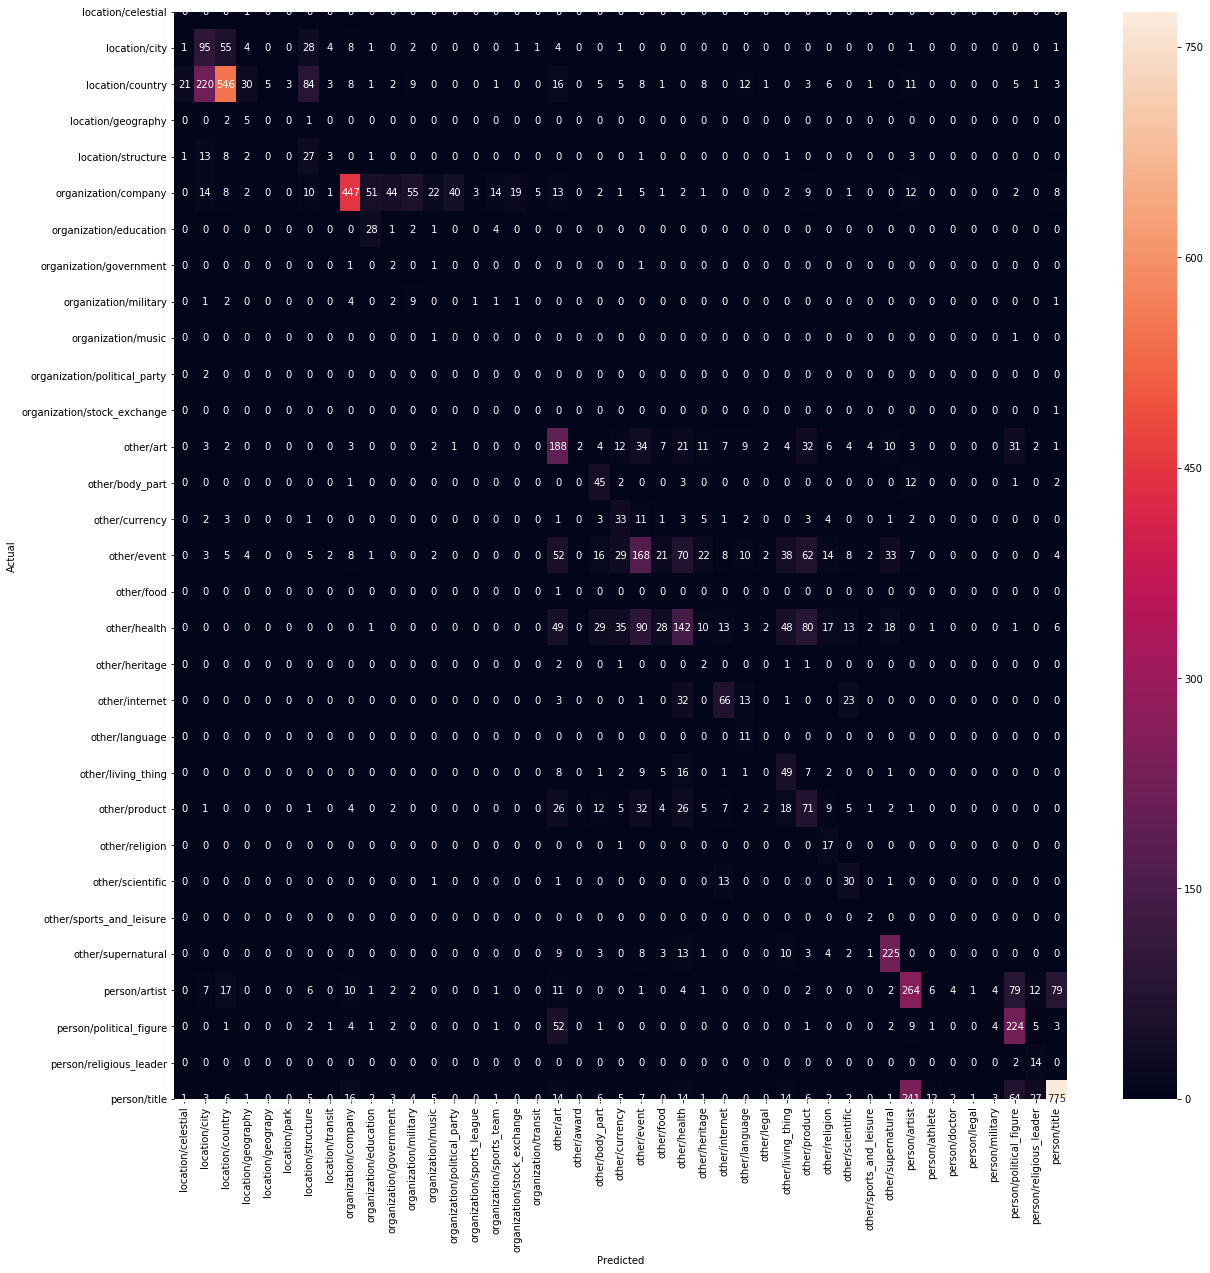

In [61]:
import pandas as pd
import seaborn as sn
plt.rcParams['figure.figsize']=20,20

data = {'y_Predicted': y_test_t,
        'y_Actual':    y_pred_
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True,fmt='.8g')

In [47]:
from sklearn.svm import SVC
svm_classifier = SVC(decision_function_shape='ovr',verbose=True)  
svm_classifier.fit(X_train, y_train)
svm_predictions_labels = svm_classifier.predict(X_test)

/home/aaloui/.local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[LibSVM]

In [59]:
from sklearn.metrics import classification_report
svm_pred = svm_classifier.predict(X_test)
y_test_t=y_test#[idx2tag[i] for i in y_test]
y_pred_=svm_pred#[idx2tag[i] for i in svm_pred]
from sklearn.metrics import f1_score
print('micro f1-score\n')
print(f1_score(y_test_t, y_pred_, average='micro'))
print('macro f1-score\n')
print(f1_score(y_test_t, y_pred_, average='macro'))

print(classification_report(y_test_t,y_pred_ ))

micro f1-score

0.539284667253005
macro f1-score

0.2624449650953526


/home/aaloui/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/aaloui/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                              precision    recall  f1-score   support

          location/celestial       1.00      0.08      0.15        24
               location/city       0.52      0.43      0.47       364
            location/country       0.57      0.84      0.68       655
          location/geography       1.00      0.16      0.28        49
           location/geograpy       0.00      0.00      0.00         5
               location/park       0.00      0.00      0.00         3
          location/structure       0.64      0.12      0.21       170
            location/transit       0.00      0.00      0.00        14
        organization/company       0.57      0.89      0.69       514
      organization/education       0.97      0.35      0.52        88
     organization/government       0.75      0.05      0.09        60
       organization/military       0.43      0.04      0.07        83
          organization/music       1.00      0.17      0.29        35
organization/politi

In [45]:
from xgboost import XGBClassifier
from sklearn.multiclass import OneVsRestClassifier
xgb_classifier = OneVsRestClassifier(XGBClassifier(verbosity=3))
xgb_classifier.fit(np.array(X_train), y_train)
xbg_predictions_labels = xgb_classifier.predict(X_test)

[16:13:23] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[16:13:27] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[16:13:31] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[16:13:35] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[16:13:39] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[16:13:44] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[16:13:48] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[16:13:52] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 

[16:17:49] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[16:17:54] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[16:17:58] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:18:02] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[16:18:06] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:18:10] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[16:18:15] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[16:18:19] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nod

[16:22:21] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:22:25] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:22:29] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:22:33] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:22:37] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:22:41] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:22:46] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:22:50] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nod

[16:26:28] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[16:26:32] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[16:26:36] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:26:41] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:26:45] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:26:49] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[16:26:53] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:26:58] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nod

[16:30:37] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[16:30:40] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:30:42] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:30:45] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:30:47] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[16:30:50] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:30:53] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:30:55] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nod

[16:33:20] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:33:22] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[16:33:25] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:33:27] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[16:33:29] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:33:32] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:33:34] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:33:36] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nod

[16:37:18] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:37:20] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:37:23] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[16:37:25] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[16:37:28] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:37:30] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[16:37:33] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:37:35] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes,

[16:39:54] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[16:39:56] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[16:39:59] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[16:40:01] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[16:40:03] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[16:40:06] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[16:40:08] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[16:40:10] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes

[16:42:12] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[16:42:14] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[16:42:16] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[16:42:19] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[16:42:21] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[16:42:23] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[16:42:26] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[16:42:28] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pr

[16:44:37] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[16:44:39] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:44:41] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[16:44:43] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[16:44:44] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[16:44:46] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:44:48] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[16:44:49] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pr

[16:46:52] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:46:54] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:46:57] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:46:59] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:47:01] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:47:04] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:47:06] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[16:47:09] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nod

[16:49:34] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[16:49:36] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[16:49:39] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[16:49:41] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[16:49:43] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[16:49:46] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[16:49:48] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[16:49:50] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pr

[16:52:04] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[16:52:06] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:52:08] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[16:52:11] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:52:13] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[16:52:15] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:52:18] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[16:52:20] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 

[16:54:40] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:54:42] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:54:44] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:54:47] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:54:49] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:54:52] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:54:54] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:54:57] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nod

[16:57:20] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:57:22] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:57:25] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[16:57:27] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[16:57:33] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:57:35] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:57:38] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:57:40] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nod

[16:59:57] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:59:59] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:00:02] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:00:04] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:00:07] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:00:09] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:00:12] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:00:14] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nod

[17:02:37] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:02:39] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:02:41] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:02:44] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:02:46] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:02:48] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:02:51] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:02:53] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nod

[17:05:13] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:05:15] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[17:05:18] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:05:20] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:05:23] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:05:25] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:05:28] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:05:30] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nod

[17:07:49] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:07:52] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:07:54] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:07:57] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:07:59] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:08:02] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:08:04] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:08:07] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nod

[17:10:30] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:10:32] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:10:35] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:10:37] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:10:39] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:10:42] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:10:44] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:10:47] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nod

[17:13:06] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[17:13:08] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:13:11] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:13:13] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:13:16] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:13:18] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:13:20] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:13:23] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nod

[17:15:43] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:15:45] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:15:47] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:15:50] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:15:52] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:15:54] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:15:57] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:15:59] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nod

[17:18:21] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[17:18:23] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[17:18:26] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[17:18:28] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[17:18:30] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[17:18:33] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[17:18:35] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[17:18:37] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pr

[17:20:51] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[17:20:53] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[17:20:55] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[17:20:57] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[17:20:59] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[17:21:01] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[17:21:04] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[17:21:06] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes

[17:23:14] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:23:16] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:23:18] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:23:21] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:23:23] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:23:25] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:23:28] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:23:30] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nod

[17:25:54] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:25:56] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:25:59] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:26:01] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:26:03] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:26:06] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:26:08] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:26:11] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nod

[17:28:25] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:28:27] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:28:30] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:28:32] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:28:34] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:28:37] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:28:39] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:28:42] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nod

[17:31:03] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:31:05] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:31:08] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:31:10] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:31:12] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:31:15] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:31:17] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:31:19] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nod

[17:33:28] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[17:33:30] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[17:33:32] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[17:33:34] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[17:33:36] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[17:33:37] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[17:33:39] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[17:33:41] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes

[17:36:05] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:36:08] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:36:10] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:36:13] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:36:15] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:36:18] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:36:21] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:36:23] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nod

[17:38:48] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[17:38:50] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[17:38:52] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[17:38:55] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[17:38:57] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[17:38:59] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[17:39:02] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[17:39:04] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pr

[17:41:13] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[17:41:15] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[17:41:17] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[17:41:19] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[17:41:21] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[17:41:22] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[17:41:24] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[17:41:26] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pr

[17:43:38] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:43:41] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:43:43] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:43:46] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:43:48] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:43:51] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:43:53] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:43:56] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nod

[17:46:23] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:46:25] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:46:27] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:46:30] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:46:32] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:46:34] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:46:37] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:46:39] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nod

[17:49:00] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:49:03] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[17:49:06] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:49:08] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:49:11] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:49:14] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:49:16] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:49:19] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nod

[17:51:42] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:51:44] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:51:47] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:51:49] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:51:52] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:51:54] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:51:57] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:51:59] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nod

[17:54:26] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:54:29] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:54:31] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:54:33] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:54:36] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:54:38] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:54:41] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:54:43] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nod

[17:57:02] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[17:57:04] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:57:07] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:57:09] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:57:12] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:57:15] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:57:17] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:57:20] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nod

[18:00:21] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18:00:25] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18:00:29] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18:00:34] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18:00:38] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18:00:42] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18:00:47] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18:00:51] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nod

[18:05:04] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18:05:09] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18:05:13] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[18:05:18] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18:05:26] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[18:05:31] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[18:05:35] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18:05:39] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nod

[18:09:42] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18:09:46] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18:09:50] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18:09:55] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18:09:59] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18:10:03] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[18:10:08] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18:10:12] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nod

[18:14:24] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18:14:28] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18:14:32] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18:14:36] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18:14:41] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18:14:45] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18:14:49] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18:14:53] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nod

[18:19:02] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[18:19:06] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18:19:11] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18:19:15] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[18:19:19] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18:19:24] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[18:19:28] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18:19:33] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra node

[18:23:40] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18:23:44] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[18:23:48] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18:23:53] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[18:23:57] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18:24:01] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[18:24:06] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[18:24:10] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nod

[18:28:22] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18:28:26] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18:28:30] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[18:28:34] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[18:28:38] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18:28:43] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[18:28:47] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18:28:51] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nod

[18:32:52] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18:32:56] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[18:33:00] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18:33:05] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[18:33:09] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18:33:13] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18:33:17] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[18:33:21] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes

[18:37:27] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[18:37:31] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[18:37:36] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[18:37:40] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[18:37:44] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[18:37:48] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18:37:53] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18:37:57] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nod

[18:42:12] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18:42:16] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18:42:20] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18:42:24] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18:42:29] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18:42:33] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18:42:37] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18:42:41] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nod

[18:46:49] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[18:46:53] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18:46:57] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18:47:02] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[18:47:06] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18:47:11] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18:47:15] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18:47:19] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nod

[18:51:28] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18:51:32] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18:51:36] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18:51:41] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18:51:45] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[18:51:49] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18:51:53] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[18:51:58] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nod

[18:56:11] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18:56:15] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18:56:20] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18:56:24] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18:56:28] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18:56:32] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18:56:37] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18:56:41] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nod

[18:59:07] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18:59:10] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18:59:12] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18:59:15] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18:59:17] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18:59:20] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18:59:23] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[18:59:25] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nod

[19:01:50] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[19:01:52] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:01:55] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:01:57] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:01:59] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:02:02] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:02:04] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:02:06] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nod

[19:04:24] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:04:26] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:04:28] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:04:31] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:04:33] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[19:04:36] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:04:38] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[19:04:41] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nod

[19:07:03] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:07:05] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:07:08] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:07:10] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:07:13] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:07:16] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[19:07:18] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:07:21] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nod

[19:09:47] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:09:49] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:09:51] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:09:54] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:09:56] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:09:59] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:10:01] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:10:03] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nod

[19:12:27] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[19:12:29] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:12:32] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:12:35] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:12:37] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:12:40] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:12:42] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[19:12:45] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nod

[19:15:06] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[19:15:08] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:15:10] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[19:15:13] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:15:15] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[19:15:18] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:15:20] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[19:15:22] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nod

[19:18:35] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[19:18:38] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[19:18:41] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[19:18:44] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[19:18:47] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[19:18:51] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[19:18:55] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[19:18:59] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pr

[19:22:23] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[19:22:25] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[19:22:28] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[19:22:30] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[19:22:32] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[19:22:34] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[19:22:36] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[19:22:39] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pr

[19:26:03] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[19:26:07] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[19:26:12] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[19:26:16] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[19:26:20] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[19:26:24] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[19:26:28] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[19:26:33] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes,

[19:29:53] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[19:29:57] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[19:30:01] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[19:30:05] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[19:30:10] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[19:30:14] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[19:30:18] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[19:30:22] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pr

[19:34:19] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[19:34:23] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[19:34:26] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[19:34:30] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[19:34:32] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[19:34:34] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[19:34:36] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[19:34:38] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pr

[19:36:36] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[19:36:38] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[19:36:40] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[19:36:42] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[19:36:44] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[19:36:46] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[19:36:48] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[19:36:50] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pr

[19:38:56] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:38:59] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[19:39:01] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:39:07] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:39:10] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:39:12] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:39:14] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:39:17] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nod

[19:41:36] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:41:39] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:41:41] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:41:44] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:41:46] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:41:49] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:41:51] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:41:54] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nod

[19:44:20] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:44:22] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[19:44:24] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[19:44:27] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:44:29] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:44:31] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:44:34] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:44:36] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nod

[19:46:55] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:46:58] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[19:47:00] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:47:03] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[19:47:05] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[19:47:08] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:47:10] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:47:13] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes

[19:49:38] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:49:40] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:49:43] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:49:45] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:49:48] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:49:50] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[19:49:53] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:49:56] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nod

In [60]:
from sklearn.metrics import classification_report
xgb_pred = xgb_classifier.predict(X_test)
y_test_t=y_test#[idx2tag[i] for i in y_test]
y_pred_=xgb_pred#[idx2tag[i] for i in xgb_pred]
from sklearn.metrics import f1_score
print('micro f1-score\n')
print(f1_score(y_test_t, y_pred_, average='micro'))
print('macro f1-score\n')
print(f1_score(y_test_t, y_pred_, average='macro'))

print(classification_report(y_test_t,y_pred_ ))

micro f1-score

0.5109938434476693
macro f1-score

0.2374472503801945
                              precision    recall  f1-score   support

          location/celestial       0.00      0.00      0.00        24
               location/city       0.46      0.26      0.33       364
            location/country       0.54      0.83      0.65       655
          location/geography       0.62      0.10      0.18        49
           location/geograpy       0.00      0.00      0.00         5
               location/park       0.00      0.00      0.00         3
          location/structure       0.45      0.16      0.23       170
            location/transit       0.00      0.00      0.00        14
        organization/company       0.56      0.87      0.68       514
      organization/education       0.78      0.32      0.45        88
     organization/government       0.40      0.03      0.06        60
       organization/military       0.41      0.11      0.17        83
          organizat

In [70]:
X_train[0]

'other/food'

In [76]:
#For Conv1D add Channel
import keras
X_train_ = np.array(X_train).reshape(-1,776,1)
X_test_ = np.array(X_test1).reshape(-1,776,1)
X_val_ = np.array(X_val).reshape(-1,776,1)

tag2idx = {t: i for i, t in enumerate(tag)}
idx2tag = {i: t for i, t in enumerate(tag)}
y_train_=np.array([tag2idx[i] for i in y_train])
y_test_=np.array([tag2idx[i] for i in y_test1])
y_val_=np.array([tag2idx[i] for i in y_val])

y_train_ = keras.utils.to_categorical(y_train_, len(set(y_train)))
y_test_ = keras.utils.to_categorical(y_test_, len(set(y_train)))
y_val_ = keras.utils.to_categorical(y_val_, len(set(y_train)))
input_shape = (776,1)

In [208]:
#Conv1D Model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Input
from tensorflow.keras import backend as K
input_tensor = Input(shape=(input_shape))
drop_out_rate=0.3
x = layers.Conv1D(64, 3, padding='valid', activation='relu', strides=1)(input_tensor)
x = layers.MaxPooling1D(2)(x)
x = layers.Dropout(drop_out_rate)(x)


x = layers.Flatten()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(drop_out_rate)(x)
# x = layers.Dense(128, activation='relu')(x)
output_tensor = layers.Dense(len(set(y_train)), activation='softmax')(x)

model = keras.Model(input_tensor, output_tensor)

model.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 776, 1)]          0         
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 774, 64)           256       
_________________________________________________________________
max_pooling1d_19 (MaxPooling (None, 387, 64)           0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 387, 64)           0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 24768)             0         
_________________________________________________________________
dense_18 (Dense)             (None, 256)               6340864   
_________________________________________________________________
dropout_19 (Dropout)         (None, 256)               0   

In [209]:
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(),
             metrics=['accuracy'])
history = model.fit(X_train_, y_train_, validation_data=[X_val_, y_val_],
          batch_size=512, 
          epochs=100,
          verbose=1)

Train on 33074 samples, validate on 4135 samples
Epoch 1/100
33074/33074 [==============================] - 28s 851us/sample - loss: 3.0254 - acc: 0.2483 - val_loss: 2.1697 - val_acc: 0.3923
Epoch 2/100
33074/33074 [==============================] - 27s 809us/sample - loss: 2.1494 - acc: 0.3724 - val_loss: 1.8693 - val_acc: 0.4496
Epoch 3/100
33074/33074 [==============================] - 27s 810us/sample - loss: 1.9399 - acc: 0.4118 - val_loss: 1.7456 - val_acc: 0.4638
Epoch 4/100
33074/33074 [==============================] - 27s 812us/sample - loss: 1.8452 - acc: 0.4319 - val_loss: 1.6990 - val_acc: 0.4747
Epoch 5/100
33074/33074 [==============================] - 27s 827us/sample - loss: 1.7941 - acc: 0.4468 - val_loss: 1.6849 - val_acc: 0.4709
Epoch 6/100
33074/33074 [==============================] - 27s 821us/sample - loss: 1.7578 - acc: 0.4549 - val_loss: 1.6416 - val_acc: 0.4830
Epoch 7/100
33074/33074 [==============================] - 27s 817us/sample - loss: 1.7213 - acc: 0

33074/33074 [==============================] - 26s 800us/sample - loss: 1.2780 - acc: 0.5695 - val_loss: 1.7042 - val_acc: 0.4955
Epoch 59/100
33074/33074 [==============================] - 26s 796us/sample - loss: 1.2724 - acc: 0.5689 - val_loss: 1.7421 - val_acc: 0.4907
Epoch 60/100
33074/33074 [==============================] - 27s 803us/sample - loss: 1.2623 - acc: 0.5703 - val_loss: 1.7241 - val_acc: 0.4941
Epoch 61/100
33074/33074 [==============================] - 26s 800us/sample - loss: 1.2613 - acc: 0.5707 - val_loss: 1.7227 - val_acc: 0.4941
Epoch 62/100
33074/33074 [==============================] - 26s 801us/sample - loss: 1.2587 - acc: 0.5719 - val_loss: 1.7383 - val_acc: 0.4972
Epoch 63/100
33074/33074 [==============================] - 27s 805us/sample - loss: 1.2425 - acc: 0.5806 - val_loss: 1.7237 - val_acc: 0.4975
Epoch 64/100
33074/33074 [==============================] - 26s 799us/sample - loss: 1.2457 - acc: 0.5756 - val_loss: 1.7335 - val_acc: 0.4902
Epoch 65/100

In [207]:
drop_out_rate=0.3
x = layers.Conv1D(64, 3, padding='valid', activation='relu', strides=1)(input_tensor)
x = layers.MaxPooling1D(2)(x)
x = layers.Dropout(drop_out_rate)(x)


x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(drop_out_rate)(x)
# x = layers.Dense(128, activation='relu')(x)
output_tensor = layers.Dense(len(set(y_train)), activation='softmax')(x)

model1 = keras.Model(input_tensor, output_tensor)

model1.summary()

AttributeError: 'Node' object has no attribute 'output_masks'

In [96]:
model1.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(),
             metrics=['accuracy'])
history = model1.fit(X_train_, y_train_, validation_data=[X_val_, y_val_],
          batch_size=512, 
          epochs=100,
          verbose=1)

Train on 33074 samples, validate on 4135 samples
Epoch 1/100
33074/33074 [==============================] - 21s 637us/sample - loss: 2.7549 - acc: 0.2780 - val_loss: 2.1046 - val_acc: 0.4133
Epoch 2/100
33074/33074 [==============================] - 20s 615us/sample - loss: 2.1270 - acc: 0.3861 - val_loss: 1.8444 - val_acc: 0.4593
Epoch 3/100
33074/33074 [==============================] - 20s 607us/sample - loss: 1.9598 - acc: 0.4140 - val_loss: 1.7450 - val_acc: 0.4658
Epoch 4/100
33074/33074 [==============================] - 20s 607us/sample - loss: 1.8606 - acc: 0.4268 - val_loss: 1.6985 - val_acc: 0.4607
Epoch 5/100
33074/33074 [==============================] - 20s 608us/sample - loss: 1.8173 - acc: 0.4393 - val_loss: 1.6778 - val_acc: 0.4747
Epoch 6/100
33074/33074 [==============================] - 20s 611us/sample - loss: 1.7717 - acc: 0.4491 - val_loss: 1.6619 - val_acc: 0.4803
Epoch 7/100
33074/33074 [==============================] - 20s 608us/sample - loss: 1.7406 - acc: 0

33074/33074 [==============================] - 20s 608us/sample - loss: 1.3481 - acc: 0.5490 - val_loss: 1.7101 - val_acc: 0.4963
Epoch 59/100
33074/33074 [==============================] - 20s 609us/sample - loss: 1.3414 - acc: 0.5530 - val_loss: 1.7211 - val_acc: 0.4912
Epoch 60/100
33074/33074 [==============================] - 20s 610us/sample - loss: 1.3390 - acc: 0.5502 - val_loss: 1.7372 - val_acc: 0.4933
Epoch 61/100
33074/33074 [==============================] - 20s 613us/sample - loss: 1.3268 - acc: 0.5517 - val_loss: 1.7238 - val_acc: 0.5030
Epoch 62/100
33074/33074 [==============================] - 20s 605us/sample - loss: 1.3377 - acc: 0.5530 - val_loss: 1.7100 - val_acc: 0.4914
Epoch 63/100
33074/33074 [==============================] - 20s 605us/sample - loss: 1.3250 - acc: 0.5588 - val_loss: 1.7964 - val_acc: 0.4967
Epoch 64/100
33074/33074 [==============================] - 20s 605us/sample - loss: 1.3278 - acc: 0.5542 - val_loss: 1.7589 - val_acc: 0.4919
Epoch 65/100

In [97]:
drop_out_rate=0.3
x = layers.Conv1D(64, 3, padding='valid', activation='relu', strides=1)(input_tensor)
x = layers.MaxPooling1D(2)(x)
x = layers.Dropout(drop_out_rate)(x)


x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(drop_out_rate)(x)
# x = layers.Dense(128, activation='relu')(x)
output_tensor = layers.Dense(len(set(y_train)), activation='softmax')(x)

model2 = keras.Model(input_tensor, output_tensor)

model2.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 776, 1)]          0         
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 774, 64)           256       
_________________________________________________________________
max_pooling1d_16 (MaxPooling (None, 387, 64)           0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 387, 64)           0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 24768)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               3170432   
_________________________________________________________________
dropout_13 (Dropout)         (None, 128)               0   

In [98]:
model2.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(),
             metrics=['accuracy'])
history = model2.fit(X_train_, y_train_, validation_data=[X_val_, y_val_],
          batch_size=64, 
          epochs=100,
          verbose=1)

Train on 33074 samples, validate on 4135 samples
Epoch 1/100
33074/33074 [==============================] - 22s 675us/sample - loss: 2.4876 - acc: 0.2928 - val_loss: 1.8775 - val_acc: 0.4242
Epoch 2/100
33074/33074 [==============================] - 22s 658us/sample - loss: 2.0301 - acc: 0.3711 - val_loss: 1.7821 - val_acc: 0.4387
Epoch 3/100
33074/33074 [==============================] - 22s 657us/sample - loss: 1.9707 - acc: 0.3841 - val_loss: 1.7524 - val_acc: 0.4351
Epoch 4/100
33074/33074 [==============================] - 22s 655us/sample - loss: 1.9380 - acc: 0.3921 - val_loss: 1.7251 - val_acc: 0.4457
Epoch 5/100
33074/33074 [==============================] - 22s 654us/sample - loss: 1.9033 - acc: 0.4004 - val_loss: 1.7274 - val_acc: 0.4493
Epoch 6/100
33074/33074 [==============================] - 22s 652us/sample - loss: 1.8901 - acc: 0.3987 - val_loss: 1.7007 - val_acc: 0.4544
Epoch 7/100
33074/33074 [==============================] - 22s 657us/sample - loss: 1.8686 - acc: 0

33074/33074 [==============================] - 22s 653us/sample - loss: 1.6480 - acc: 0.4476 - val_loss: 1.8199 - val_acc: 0.4653
Epoch 59/100
33074/33074 [==============================] - 22s 652us/sample - loss: 1.6447 - acc: 0.4468 - val_loss: 1.7908 - val_acc: 0.4597
Epoch 60/100
33074/33074 [==============================] - 22s 652us/sample - loss: 1.6430 - acc: 0.4475 - val_loss: 1.8268 - val_acc: 0.4655
Epoch 61/100
33074/33074 [==============================] - 21s 649us/sample - loss: 1.6459 - acc: 0.4491 - val_loss: 1.8123 - val_acc: 0.4588
Epoch 62/100
33074/33074 [==============================] - 21s 629us/sample - loss: 1.6391 - acc: 0.4484 - val_loss: 1.7848 - val_acc: 0.4602
Epoch 63/100
33074/33074 [==============================] - 22s 651us/sample - loss: 1.6479 - acc: 0.4482 - val_loss: 1.8049 - val_acc: 0.4641
Epoch 64/100
33074/33074 [==============================] - 22s 654us/sample - loss: 1.6368 - acc: 0.4508 - val_loss: 1.8152 - val_acc: 0.4590
Epoch 65/100

In [206]:
drop_out_rate=0.3
x = layers.Conv1D(64, 3, padding='valid', activation='relu', strides=1)(input_tensor)
x = layers.MaxPooling1D(2)(x)
x = layers.Dropout(drop_out_rate)(x)


x = layers.Flatten()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(drop_out_rate)(x)
# x = layers.Dense(128, activation='relu')(x)
output_tensor = layers.Dense(len(set(y_train)), activation='softmax')(x)

model = keras.Model(input_tensor, output_tensor)

model.summary()

AttributeError: 'Node' object has no attribute 'output_masks'

In [102]:
model3.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(),
             metrics=['accuracy'])
history = model3.fit(X_train_, y_train_, validation_data=[X_val_, y_val_],
          batch_size=1024, 
          epochs=100,
          verbose=1)

Train on 33074 samples, validate on 4135 samples
Epoch 1/100
33074/33074 [==============================] - 21s 631us/sample - loss: 3.5184 - acc: 0.1423 - val_loss: 2.6886 - val_acc: 0.3381
Epoch 2/100
33074/33074 [==============================] - 20s 617us/sample - loss: 2.5871 - acc: 0.3057 - val_loss: 2.2282 - val_acc: 0.3937
Epoch 3/100
33074/33074 [==============================] - 20s 597us/sample - loss: 2.2740 - acc: 0.3639 - val_loss: 1.9820 - val_acc: 0.4314
Epoch 4/100
33074/33074 [==============================] - 20s 595us/sample - loss: 2.0902 - acc: 0.3880 - val_loss: 1.8625 - val_acc: 0.4508
Epoch 5/100
33074/33074 [==============================] - 19s 570us/sample - loss: 1.9967 - acc: 0.4049 - val_loss: 1.7915 - val_acc: 0.4544
Epoch 6/100
33074/33074 [==============================] - 19s 586us/sample - loss: 1.9217 - acc: 0.4203 - val_loss: 1.7413 - val_acc: 0.4634
Epoch 7/100
33074/33074 [==============================] - 20s 604us/sample - loss: 1.8784 - acc: 0

33074/33074 [==============================] - 21s 624us/sample - loss: 1.4146 - acc: 0.5322 - val_loss: 1.6481 - val_acc: 0.4965
Epoch 59/100
33074/33074 [==============================] - 21s 626us/sample - loss: 1.4314 - acc: 0.5270 - val_loss: 1.6504 - val_acc: 0.4943
Epoch 60/100
33074/33074 [==============================] - 21s 624us/sample - loss: 1.4257 - acc: 0.5278 - val_loss: 1.6367 - val_acc: 0.4936
Epoch 61/100
33074/33074 [==============================] - 21s 621us/sample - loss: 1.3997 - acc: 0.5339 - val_loss: 1.6326 - val_acc: 0.5011
Epoch 62/100
33074/33074 [==============================] - 20s 620us/sample - loss: 1.4042 - acc: 0.5315 - val_loss: 1.6696 - val_acc: 0.4965
Epoch 63/100
33074/33074 [==============================] - 21s 627us/sample - loss: 1.4095 - acc: 0.5297 - val_loss: 1.6546 - val_acc: 0.4984
Epoch 64/100
33074/33074 [==============================] - 21s 623us/sample - loss: 1.3966 - acc: 0.5340 - val_loss: 1.6613 - val_acc: 0.4921
Epoch 65/100

In [210]:

# Evaluate the model on the test data using `evaluate`
print('\n# Evaluate on validation data')
results = model3.evaluate(X_test_, y_test_, batch_size=1024)
# print('test loss, test acc:', results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
predictions = model.predict(X_test_)
print('predictions shape:', predictions.shape)
from sklearn.metrics import classification_report
y_pred=[np.argmax(predictions[i]) for i in range(len(X_test_))]

y_test_t=y_test1#[idx2tag[i] for i in y_test]
y_pred_=[idx2tag[i] for i in y_pred]
from sklearn.metrics import f1_score
print('micro f1-score\n')
print(f1_score(y_test_t, y_pred_, average='micro'))
print('macro f1-score\n')
print(f1_score(y_test_t, y_pred_, average='macro'))

print(classification_report(y_test_t,y_pred_ ))


# Evaluate on validation data
4134/4134 [==============================] - 1s 174us/sample - loss: 1.7138 - acc: 0.4840
predictions shape: (4134, 44)
micro f1-score

0.4910498306724722
macro f1-score

0.24331126782766968
                              precision    recall  f1-score   support

          location/celestial       1.00      0.21      0.35        14
               location/city       0.49      0.54      0.51       229
            location/country       0.59      0.66      0.63       357
          location/geography       0.50      0.07      0.12        28
           location/geograpy       0.00      0.00      0.00         3
               location/park       0.00      0.00      0.00         2
          location/structure       0.40      0.23      0.29        82
            location/transit       0.00      0.00      0.00         8
        organization/company       0.53      0.88      0.66       307
      organization/education       0.86      0.41      0.55        59
     or

/home/aaloui/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/aaloui/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/aaloui/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/aaloui/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_

In [106]:
data_mean={}

for key in data.keys():
    data_mean[key]=np.mean(data[key],axis=0)

In [188]:
# Define model
from keras import models
from keras import layers
from keras import optimizers
from keras.regularizers import l2



model = models.Sequential()
model.add(layers.Flatten(input_shape=input_shape))
model.add(layers.Dense(256, activation='relu', input_dim=input_shape, kernel_regularizer=l2(0.01)))
model.add(layers.Dropout(0.))
model.add(layers.Dense(44, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 776)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               198912    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 44)                11308     
Total params: 210,220
Trainable params: 210,220
Non-trainable params: 0
_________________________________________________________________


In [190]:
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=optimizers.Adam(),
             metrics=['accuracy'])
history = model.fit(X_train_, y_train_, validation_data=[X_val_, y_val_],
          batch_size=1024, 
          epochs=100,
          verbose=1)

Train on 33074 samples, validate on 4135 samples
Epoch 1/100
33074/33074 [==============================] - 3s 78us/step - loss: 5.5534 - acc: 0.3410 - val_loss: 4.1799 - val_acc: 0.4368
Epoch 2/100
33074/33074 [==============================] - 1s 20us/step - loss: 3.5133 - acc: 0.4607 - val_loss: 2.9955 - val_acc: 0.4839
Epoch 3/100
33074/33074 [==============================] - 1s 19us/step - loss: 2.6488 - acc: 0.4963 - val_loss: 2.4448 - val_acc: 0.4861
Epoch 4/100
33074/33074 [==============================] - 1s 20us/step - loss: 2.2243 - acc: 0.5147 - val_loss: 2.1685 - val_acc: 0.4938
Epoch 5/100
33074/33074 [==============================] - 1s 21us/step - loss: 1.9961 - acc: 0.5221 - val_loss: 2.0016 - val_acc: 0.5079
Epoch 6/100
33074/33074 [==============================] - 1s 20us/step - loss: 1.8538 - acc: 0.5302 - val_loss: 1.8943 - val_acc: 0.5141
Epoch 7/100
33074/33074 [==============================] - 1s 20us/step - loss: 1.7634 - acc: 0.5362 - val_loss: 1.8270 - v

In [193]:

# Evaluate the model on the test data using `evaluate`
print('\n# Evaluate on validation data')
results = model.evaluate(X_test_, y_test_, batch_size=1024)
# print('test loss, test acc:', results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
predictions = model.predict(X_test_)
print('predictions shape:', predictions.shape)
from sklearn.metrics import classification_report
y_pred=[np.argmax(predictions[i]) for i in range(len(X_test_))]

y_test_t=y_test1#[idx2tag[i] for i in y_test]
y_pred_=[idx2tag[i] for i in y_pred]
from sklearn.metrics import f1_score
print('micro f1-score\n')
print(f1_score(y_test_t, y_pred_, average='micro'))
print('macro f1-score\n')
print(f1_score(y_test_t, y_pred_, average='macro'))

print(classification_report(y_test_t,y_pred_ ))


# Evaluate on validation data
4134/4134 [==============================] - 0s 12us/step
predictions shape: (4134, 44)
micro f1-score

0.5435413642960812
macro f1-score

0.3172862347322672
                              precision    recall  f1-score   support

          location/celestial       0.62      0.36      0.45        14
               location/city       0.58      0.38      0.46       229
            location/country       0.57      0.85      0.68       357
          location/geography       0.50      0.11      0.18        28
           location/geograpy       0.00      0.00      0.00         3
               location/park       0.00      0.00      0.00         2
          location/structure       0.33      0.24      0.28        82
            location/transit       0.50      0.12      0.20         8
        organization/company       0.66      0.80      0.72       307
      organization/education       0.40      0.63      0.49        59
     organization/government       0.31 

/home/aaloui/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/aaloui/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/aaloui/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/aaloui/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_

In [ ]:
# Define model
from keras import models
from keras import layers
from keras import optimizers
from keras.regularizers import l2



model = models.Sequential()
model.add(layers.Flatten(input_shape=input_shape))
model.add(layers.Dense(256, activation='relu', input_dim=input_shape, kernel_regularizer=l2(0.01)))
model.add(layers.Dropout(0.))
model.add(layers.Dense(44, activation='softmax'))
model.summary()

model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=optimizers.Adam(),
             metrics=['accuracy'])
history = model.fit(X_train_, y_train_, validation_data=[X_val_, y_val_],
          batch_size=1024, 
          epochs=100,
          verbose=1)


# Evaluate the model on the test data using `evaluate`
print('\n# Evaluate on validation data')
results = model.evaluate(X_test_, y_test_, batch_size=1024)
# print('test loss, test acc:', results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
predictions = model.predict(X_test_)
print('predictions shape:', predictions.shape)
from sklearn.metrics import classification_report
y_pred=[np.argmax(predictions[i]) for i in range(len(X_test_))]

y_test_t=y_test1#[idx2tag[i] for i in y_test]
y_pred_=[idx2tag[i] for i in y_pred]
from sklearn.metrics import f1_score
print('micro f1-score\n')
print(f1_score(y_test_t, y_pred_, average='micro'))
print('macro f1-score\n')
print(f1_score(y_test_t, y_pred_, average='macro'))

print(classification_report(y_test_t,y_pred_ ))



In [204]:

# Evaluate the model on the test data using `evaluate`
print('\n# Evaluate on validation data')
results = model3.evaluate(X_test_, y_test_, batch_size=1024)
# print('test loss, test acc:', results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
predictions = model3.predict(X_test_)
print('predictions shape:', predictions.shape)
from sklearn.metrics import classification_report
y_pred=[np.argmax(predictions[i]) for i in range(len(X_test_))]

y_test_t=y_test1#[idx2tag[i] for i in y_test]
y_pred_=[idx2tag[i] for i in y_pred]
from sklearn.metrics import f1_score
print('micro f1-score\n')
print(f1_score(y_test_t, y_pred_, average='micro'))
print('macro f1-score\n')
print(f1_score(y_test_t, y_pred_, average='macro'))

print(classification_report(y_test_t,y_pred_ ))


# Evaluate on validation data
4134/4134 [==============================] - 1s 165us/sample - loss: 1.7138 - acc: 0.4840
predictions shape: (4134, 44)
micro f1-score

0.48403483309143686
macro f1-score

0.21778144877490746
                              precision    recall  f1-score   support

          location/celestial       0.00      0.00      0.00        14
               location/city       0.51      0.37      0.43       229
            location/country       0.55      0.76      0.63       357
          location/geography       0.67      0.07      0.13        28
           location/geograpy       0.00      0.00      0.00         3
               location/park       0.00      0.00      0.00         2
          location/structure       0.28      0.15      0.19        82
            location/transit       0.00      0.00      0.00         8
        organization/company       0.52      0.93      0.67       307
      organization/education       0.83      0.41      0.55        59
     o

/home/aaloui/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/aaloui/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/aaloui/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/aaloui/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_

In [201]:
# Define model
from keras import models
from keras import layers
from keras import optimizers
from keras.regularizers import l2



model = models.Sequential()
model.add(layers.Flatten(input_shape=input_shape))
model.add(layers.Dense(256, activation='relu', input_dim=input_shape, kernel_regularizer=l2(0.01)))
model.add(layers.Dropout(0.))
model.add(layers.Dense(44, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 776)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 256)               198912    
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 44)                11308     
Total params: 210,220
Trainable params: 210,220
Non-trainable params: 0
_________________________________________________________________


In [202]:
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=optimizers.Adam(),
             metrics=['accuracy'])
history = model.fit(X_train_, y_train_, validation_data=[X_val_, y_val_],
          batch_size=512, 
          epochs=100,
          verbose=1)

Train on 33074 samples, validate on 4135 samples
Epoch 1/100
33074/33074 [==============================] - 3s 98us/step - loss: 4.8200 - acc: 0.3743 - val_loss: 3.2433 - val_acc: 0.4636
Epoch 2/100
33074/33074 [==============================] - 1s 27us/step - loss: 2.6708 - acc: 0.4819 - val_loss: 2.3252 - val_acc: 0.4837
Epoch 3/100
33074/33074 [==============================] - 1s 27us/step - loss: 2.0839 - acc: 0.5086 - val_loss: 1.9873 - val_acc: 0.4958
Epoch 4/100
33074/33074 [==============================] - 1s 28us/step - loss: 1.8584 - acc: 0.5175 - val_loss: 1.8637 - val_acc: 0.5006
Epoch 5/100
33074/33074 [==============================] - 1s 28us/step - loss: 1.7506 - acc: 0.5246 - val_loss: 1.7862 - val_acc: 0.5037
Epoch 6/100
33074/33074 [==============================] - 1s 28us/step - loss: 1.6884 - acc: 0.5303 - val_loss: 1.7550 - val_acc: 0.5083
Epoch 7/100
33074/33074 [==============================] - 1s 28us/step - loss: 1.6588 - acc: 0.5306 - val_loss: 1.7351 - v

In [203]:

# Evaluate the model on the test data using `evaluate`
print('\n# Evaluate on validation data')
results = model.evaluate(X_test_, y_test_, batch_size=1024)
# print('test loss, test acc:', results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
predictions = model.predict(X_test_)
print('predictions shape:', predictions.shape)
from sklearn.metrics import classification_report
y_pred=[np.argmax(predictions[i]) for i in range(len(X_test_))]

y_test_t=y_test1#[idx2tag[i] for i in y_test]
y_pred_=[idx2tag[i] for i in y_pred]
from sklearn.metrics import f1_score
print('micro f1-score\n')
print(f1_score(y_test_t, y_pred_, average='micro'))
print('macro f1-score\n')
print(f1_score(y_test_t, y_pred_, average='macro'))

print(classification_report(y_test_t,y_pred_ ))


# Evaluate on validation data
4134/4134 [==============================] - 0s 13us/step
predictions shape: (4134, 44)
micro f1-score

0.5171746492501209
macro f1-score

0.28711994375303324
                              precision    recall  f1-score   support

          location/celestial       0.83      0.36      0.50        14
               location/city       0.49      0.55      0.52       229
            location/country       0.64      0.65      0.64       357
          location/geography       0.40      0.07      0.12        28
           location/geograpy       0.00      0.00      0.00         3
               location/park       0.00      0.00      0.00         2
          location/structure       0.29      0.35      0.32        82
            location/transit       0.00      0.00      0.00         8
        organization/company       0.61      0.79      0.69       307
      organization/education       0.45      0.56      0.50        59
     organization/government       0.33

/home/aaloui/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/aaloui/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/aaloui/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/aaloui/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_